# Introduction to Clustering and K-Means

---

![](https://snag.gy/kYWumd.jpg)

### Learning Objectives

- Understand basic unsupervised clustering problems
- Format and preprocess data for cluster
- Perform a K-Means Clustering Analysis
- Evaluate clusters for fit 

### Lesson Guide
- [Unsupervised learning](#unsupervised)
- [Introduction to clustering](#intro)
- [What is clustering?](#what)
- [KNN review](#knn)
- [Clustering algorithms](#algos)
- [K-means clustering](#k-means)
- [Refresher: Euclidean distance](#euclidean)
- [K-Means step-by-step](#km-steps)
- [K-Means: a visual example](#vis)
- [K-Means caveats and pitfalls](#caveats)
    - [Sensitive to outliers](#sensitive)
    - [Sensitive to centroid initialization](#centroid-init)
    - [How many K?](#how-choose-k)
- [Choosing K](#choose-k)
- [A note on K-Means convergence](#converge)
- [K-Means in sklearn](#sklearn)
    - [Visually verifying cluster labels](#verify)
- [Metrics: inertia and the silhouette coefficient](#sil)
- [Practice: use K-Means on the "Isotopic Composition Plutonium Batches" data](#pluto)
    - [How does scaling affect fit?](#scaling)
- [Conclusion: K-Means tradeoffs](#conclusion)
- [Additional resources](#resources)

In [9]:
from IPython.display import Image
from IPython.core.display import HTML 

<a id='unsupervised'></a>

## Unsupervised learning

---

> **Supervised --> Classification** - create a model to predict which group a point belongs to.

> **Unsupervised --> Clustering** - find groups that exist in the data already.

We use unsupervised methods when we don't have labeled  data. There are no true targets to predict, we derive the likely categories from the structure in our data.

| Pros | Cons |
|---|---|
| No labels | Difficult to evaluate correctness without subject matter expertise |
| Few or no assumptions about data | Scaling / normalization often required |
| Useful for subset / segmentation discovery | Can be difficult to visualize |
| Great for broad insights | Extremely difficult to tune |
| Many models avalable | No obvious choice in many cases |
| Black magic | Considered "unconventional" and unreliable |

<a name="intro"></a>
## Introduction to Clustering

---

### Helpful uses for Clustering: 
   - Find items with similar behavior (users, products, voters, etc)
   - Market segmentation
   - Understand complex systems
   - Discover meaningful categories for your data
   - Reduce the number of classes by grouping (e.g. bourbons, scotches -> whiskeys)
   - Reduce the dimensions of your problem
   - Pre-processing! Create labels for supervised learning

<a id='what'></a>
## What is Clustering? 

---

<img src="https://snag.gy/BdfATE.jpg" style="width: 500px">

Clustering is one of the most ubiquitous and widespread processes for assigning discrete structure to data. In clustering, we group observations in a dataset together such that the members of a group are more similar to each other than they are to members of other groups. There are a wide variety of methods and criteria to perform this task.

**Properties of clustering procedures:**
- No "true" target / response to compare
- We apply structure to data quantitatively based on specific criteria
- Predictions of label are based on the structure of the data

For example: your employer gives you a dataset of voter preferences from a local poll. They want you to figure out just exactly how these voters are grouping based on their preferences. The answer: clustering!

<a id='knn'></a>
## KNN review

---

KNN is a supervised classification method.

![](https://snag.gy/WPF4ZS.jpg)

<a name="algos"></a>
## Clustering Algorithms 

---

The are many different algorithms that can perform clustering given a dataset:

- **K-Means** (mean centroids)
- **Heirarchical** (nested clusters by merging or splitting successively)
- **DBSCAN** (density based)
- **Affinity Propagation** (graph based approach to let points 'vote' on their preferred 'exemplar')
- **Mean Shift** (can find number of clusters)
- **Spectral Clustering**
- **Agglomerative Clustering** (suite of algorithms all based on applying the same criteria/characteristics of one cluster to others)



Today we're going to look only at one of the algorithms: **k-means.**

<a id='k-means'></a>
## K-Means clustering

---

#### K-Means is the most popular clustering algorithm

K-means is one of the easier methods to understand and other clustering techniques use some of the same assumptions that K-Means relies on.

- **K** is the number of clusters.
- **Means** refers to the mean points of the K clusters.

The number of clusters $k$ is chosen in advance. The goal is to partition the data into set such that the total sum of squared distances from each point to the mean point of the cluster is minimized.

The algorithm takes your entire dataset and iterates over its features and observations to determine clusters based around center points. These center points are known as **centroids**. 

**K-means Iterative Fitting:**
1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Create your clusters. Assign each point to the nearest centroid. 
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

> **Note:** Unfortunately there is no formula to determine the absolute best number of $k$ clusters. Unsupervised learning is inherently subjective! We can, however, choose the "best" $k$ based on predetermined criteria. 

<a id='euclidean'></a>
## Euclidean distance

---

### $$ d(x_1, x_2) = \sqrt{\sum_{i=1}^N (x_{1i} - x_{2i})^2} $$

**For example, take two points:**

- $x1 = (2, -1)$
- $x2 = (-2, 2)$

**The Euclidean distance between these two points is:**

### $$\begin{aligned}
d(x1, x2) &= \sqrt{ (2 - (-2))^2 + ((-1) - 2)^2 } \\
d(x1, x2) &= \sqrt{25} \\
d(x1, x2) &= 5 
\end{aligned}$$

**Using sklearn:**
```python
import numpy as np
from sklearn.metrics import euclidean_distances
X = np.array([[2, -1], [-2, 2]])
print euclidean_distances(X)
```



<a id='km-steps'></a>
## K-Means step-by-step

---

<table width="500" cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/7haoS3.jpg" style="width: 150px"></td>
   <td style="vertical-align: top; width: 400px;"><br><b>Step 1.</b><br>We have data in a N-Dimensional feature space (2D for example).</td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/DaIVgk.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><br><b>Step 2.</b><br>Intialize K centroid (2 here).</td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/DaIVgk.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Step 3.</b><br>Assign points to *closest* cluster based on _euclidean distance_.<br><br>$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$

   </td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/NY1EeT.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Step 4.</b><br>Calculate mean of points assigned to centroid (2 here).  Update new centroid positions to mean (ie: geometric center).<br><br>$new\ centroid\ position= \bar{x}, \bar{y}$
   </td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/tSfDZs.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Step 5.</b><br>Repeat step 3-4, updating class membership based on centroid distance.
   </td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/BbIicn.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Fin.</b><br>Convergence is met once all points no longer change to a new class (defined by closest centroid distance).
   </td>
</tr>
<tr>
</table>

<a id='vis'></a>
## K-Means: a visual example

---

![](https://snag.gy/5hFXUA.jpg)

<a id='caveats'></a>
## A few K-Means caveats...

---

Nothing's perfect!

<a id='sensitive'></a>
### K-Means is sensitive to outliers

![](https://snag.gy/WFNMQY.jpg)

<a id='centroid-init'></a>
### K-Means is sensitive to centroid initialization

![](https://snag.gy/5sigCD.jpg)

<a id='how-many-k'></a>
### How many K?

Sometimes it's obvious, sometimes it's not!  What do you think?

<table>
    <tr>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="http://i.stack.imgur.com/4rU39.png"><br>1</td>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="http://i.stack.imgur.com/gq28F.png"><br>2</td>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="https://snag.gy/cWPgno.jpg"><br>3</td>
    </tr>
</table>

<a id='choose-k'></a>
## Choosing K

---

There are different methods of initializing centroids. For instance:

- Randomly
- Manually
- Special KMeans++ method in Sklearn (_This initializes the centroids to be generally distant from each other_)

**Depending on your problem, you may find some of these are better than others.**

> **Note:** Manual is recommended if you know your data well enough to see the clusters without much help, but rarely used in practice.

<a id='converge'></a>
## A note on K-Means Convergence

---

In general, k-means will converge to a solution and return a partition of k clusters, even if no natural clusters exist in the data.  It's entirely possible – in fact, *common* – that the clusters do not mean anything at all. 

**Knowing your domain and dataset is essential. Evaluating the clusters visually is a must (if possible).**

> _"Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference."_ [sklearn Clustering Guide](http://scikit-learn.org/stable/modules/clustering.html#k-means)

![](http://www.datamilk.com/kmeans_animation.gif)

## K-Means in sklearn

---

Below we will implement K-Means using sklearn.

In [73]:
%matplotlib inline

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

X, y = make_blobs(
    n_samples    =  200, 
    centers      =  3, 
    n_features   =  2,
    random_state =  0
)

df = pd.DataFrame(X, columns=['x', 'y'])
df.head(3)

,x,y
0,-1.733808,3.798061
1,0.628358,4.460136
2,1.131218,4.681950


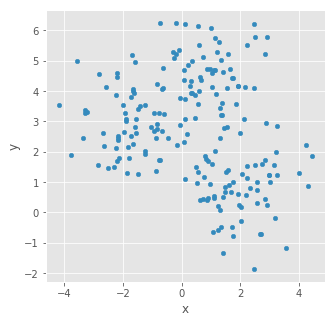

In [74]:
df.plot(kind="scatter", x="x", y="y", figsize=(5, 5));

In [75]:
## Take note that the latest version of Kmeans behaves a little differently now
model = KMeans(n_clusters=3, random_state=0).fit(df)

After we fit our data, we can get our predicted labels from `model.labels_` and the center points`model.cluster_centers_`.

In [76]:
predicted = model.labels_
centroids = model.cluster_centers_

print ("Predicted clusters to points: ", predicted)
print ("Location of centroids: ")
print (centroids)

Predicted clusters to points:  [1 0 0 1 0 1 2 0 0 1 0 1 0 0 0 1 2 2 1 1 1 2 0 0 1 1 2 1 1 1 0 0 1 0 2 2 0
 2 2 1 2 1 1 1 0 0 0 1 0 0 0 2 1 1 1 1 2 2 0 0 1 0 0 2 2 1 2 2 1 2 2 0 0 1
 0 1 2 2 2 1 1 0 0 2 2 0 0 1 0 2 1 1 2 0 2 0 0 1 1 2 2 0 1 0 1 0 2 0 1 2 0
 1 2 0 0 0 0 2 1 1 2 2 1 0 2 1 1 2 1 0 1 2 2 2 0 2 2 0 2 1 1 1 0 2 2 0 1 1
 2 0 2 1 1 1 0 2 2 2 0 0 2 1 1 1 0 0 2 1 2 2 1 2 0 2 1 1 2 1 0 2 0 1 2 2 2
 2 1 2 0 0 1 1 2 2 2 2 1 2 0 2]
Location of centroids: 
[[ 0.97692125  4.56883102]
 [-1.71656153  2.91261167]
 [ 1.98410174  0.81302038]]


In [77]:
df['predicted'] = predicted
df.head()

,x,y,predicted
0,-1.733808,3.798061,1
1,0.628358,4.460136,0
2,1.131218,4.681950,0
3,-1.429179,3.500836,1
4,1.274508,5.630173,0


### Visually verifying Cluster Labels

C:\Users\Ali\Anaconda3\lib\site-packages\pandas\plotting\_core.py:211: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


<Figure size 504x504 with 0 Axes>

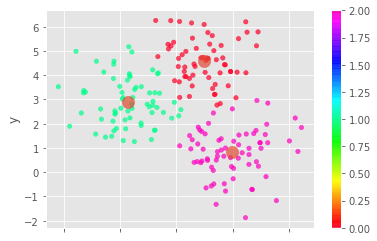

In [89]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7));

df.plot(x="x", y="y", kind="scatter", color=df['predicted'],colormap='gist_rainbow', alpha=.7);
plt.scatter(centroids[:,:1], centroids[:,1:], marker='o', s=150, alpha=.7, cmap='gist_rainbow');

<a id='sil'></a>

## Metrics: Inertia and the Silhouette Coefficient

---

**Inertia** -- sum of squared errors for each cluster
- low inertia = dense cluster

**Silhouette Coefficient** -- measure of how far apart clusters are
- high Silhouette Score = clusters are well separated

The silhouette coefficient evaluates the viability of your clusters. It is a way to quantify the "cohesion" of local points to their clusters and the seperation to other clusters.


In [90]:
score = silhouette_score(df, predicted, metric='euclidean')
score

0.5388481927664504

<a id='pluto'></a>
## Practice: sklearn + K-Means with "Isotopic Composition Plutonium Batches"

---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.

In [91]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head(5)

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot it to see how it looks.
1. Initialize an instance of `KMeans` from `sklearn`.
1. Fit our sliced dataframe with the `fit`.

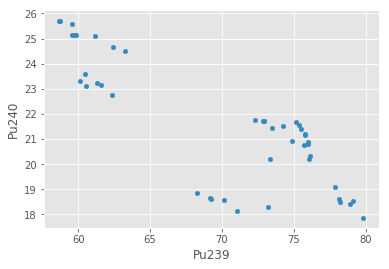

In [92]:
features = ['Pu239', 'Pu240']
df[features].plot(kind="scatter", x=features[0], y=features[1]);

Silhouette Score:  0.5961512620581957


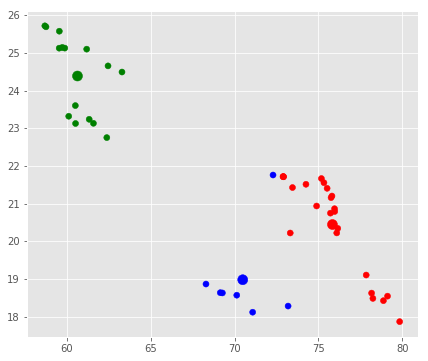

In [93]:
# Run K-Means against our 2 features with 3 clusters
k = 3
model = KMeans(n_clusters=k, max_iter=1)
model.fit(df[features].values)

# Check our results
# Assign clusters back to our dataframe
df['cluster'] = model.labels_

# Get our centrois
centroids    =  model.cluster_centers_
cc           =  pd.DataFrame(centroids)

# Setup some sweet colors for plotting (for later)
# colors = {'D':'red', 'E':'blue', 'F':'green'}
base_colors  =  ['r', 'g', 'b']
colors       =  [base_colors[centroid] for centroid in model.labels_]

# update x,y of our final clusters to plot later
fig, ax      =  plt.subplots(figsize=(7,6))

# Plot the scatter of our points with calculated centroids
ax.scatter(df[features[0]], df[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100) # cc.index

# And our score
print ("Silhouette Score: ", silhouette_score(df[features], df['cluster'], metric='euclidean'));

In [94]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0,
       1])

<a id='scaling'></a>
### Try standardizing the data first and see how it affects the Cluster assignment


Silhouette Score:  0.6332174776862322


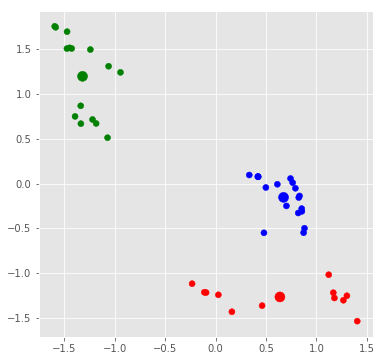

In [95]:
from sklearn.preprocessing import scale

df = pd.read_csv(csv_file)
df[features] = scale(df[features])

model = KMeans(n_clusters = k)
model.fit(df[features])

# Check our results
# Assign clusters back to our dataframe
df['cluster'] = model.labels_

# Get our centrois
centroids = model.cluster_centers_
cc = pd.DataFrame(centroids)

# Setup some sweet colors for plotting (for later)
# colors = {'D':'red', 'E':'blue', 'F':'green'}
base_colors  =  ['r', 'g', 'b']
colors       =  [base_colors[centroid] for centroid in model.labels_]

# update x,y of our final clusters to plot later
fig, ax = plt.subplots(figsize=(6,6))

# Plot the scatter of our points with calculated centroids
ax.scatter(df[features[0]], df[features[1]], c=colors) # can also pass df['clusters'] as colors for quick and dirty plots
ax.scatter(cc[0], cc[1], c=base_colors, s=100)

# And our score
print ("Silhouette Score: ", silhouette_score(df[features], df['cluster'], metric='euclidean'));

## Conclusion: K-Means tradeoffs

---

**K-Means:**
- Unsupervised clustering model
- Similar to KNN (but for “clustering”)
- Iteratively finds labels given K
- Easy to implement in sklearn
- Sensitive to shape, scale of data
- Optimal K hard to evaluate

---

| Strengths | Weaknesses |
| -- | -- |
| K-Means is popular because it's simple and computationally efficient. | However, K-Means is highly scale dependent and isn't suitable for data of varying shapes and densities. |
| Easy to see results / intuitive. | Evaluating results is more subjective, requiring much more human evaluation than trusted metrics. |

# K-Means Clustering with Seeds Data

In [43]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

In [96]:
seeds = pd.read_csv("seeds.csv")
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [67]:
seeds.isnull().sum()

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
labels             0
label              0
dtype: int64

In [68]:
seeds.dtypes

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
groove_length      float64
species              int64
labels               int32
label                int32
dtype: object

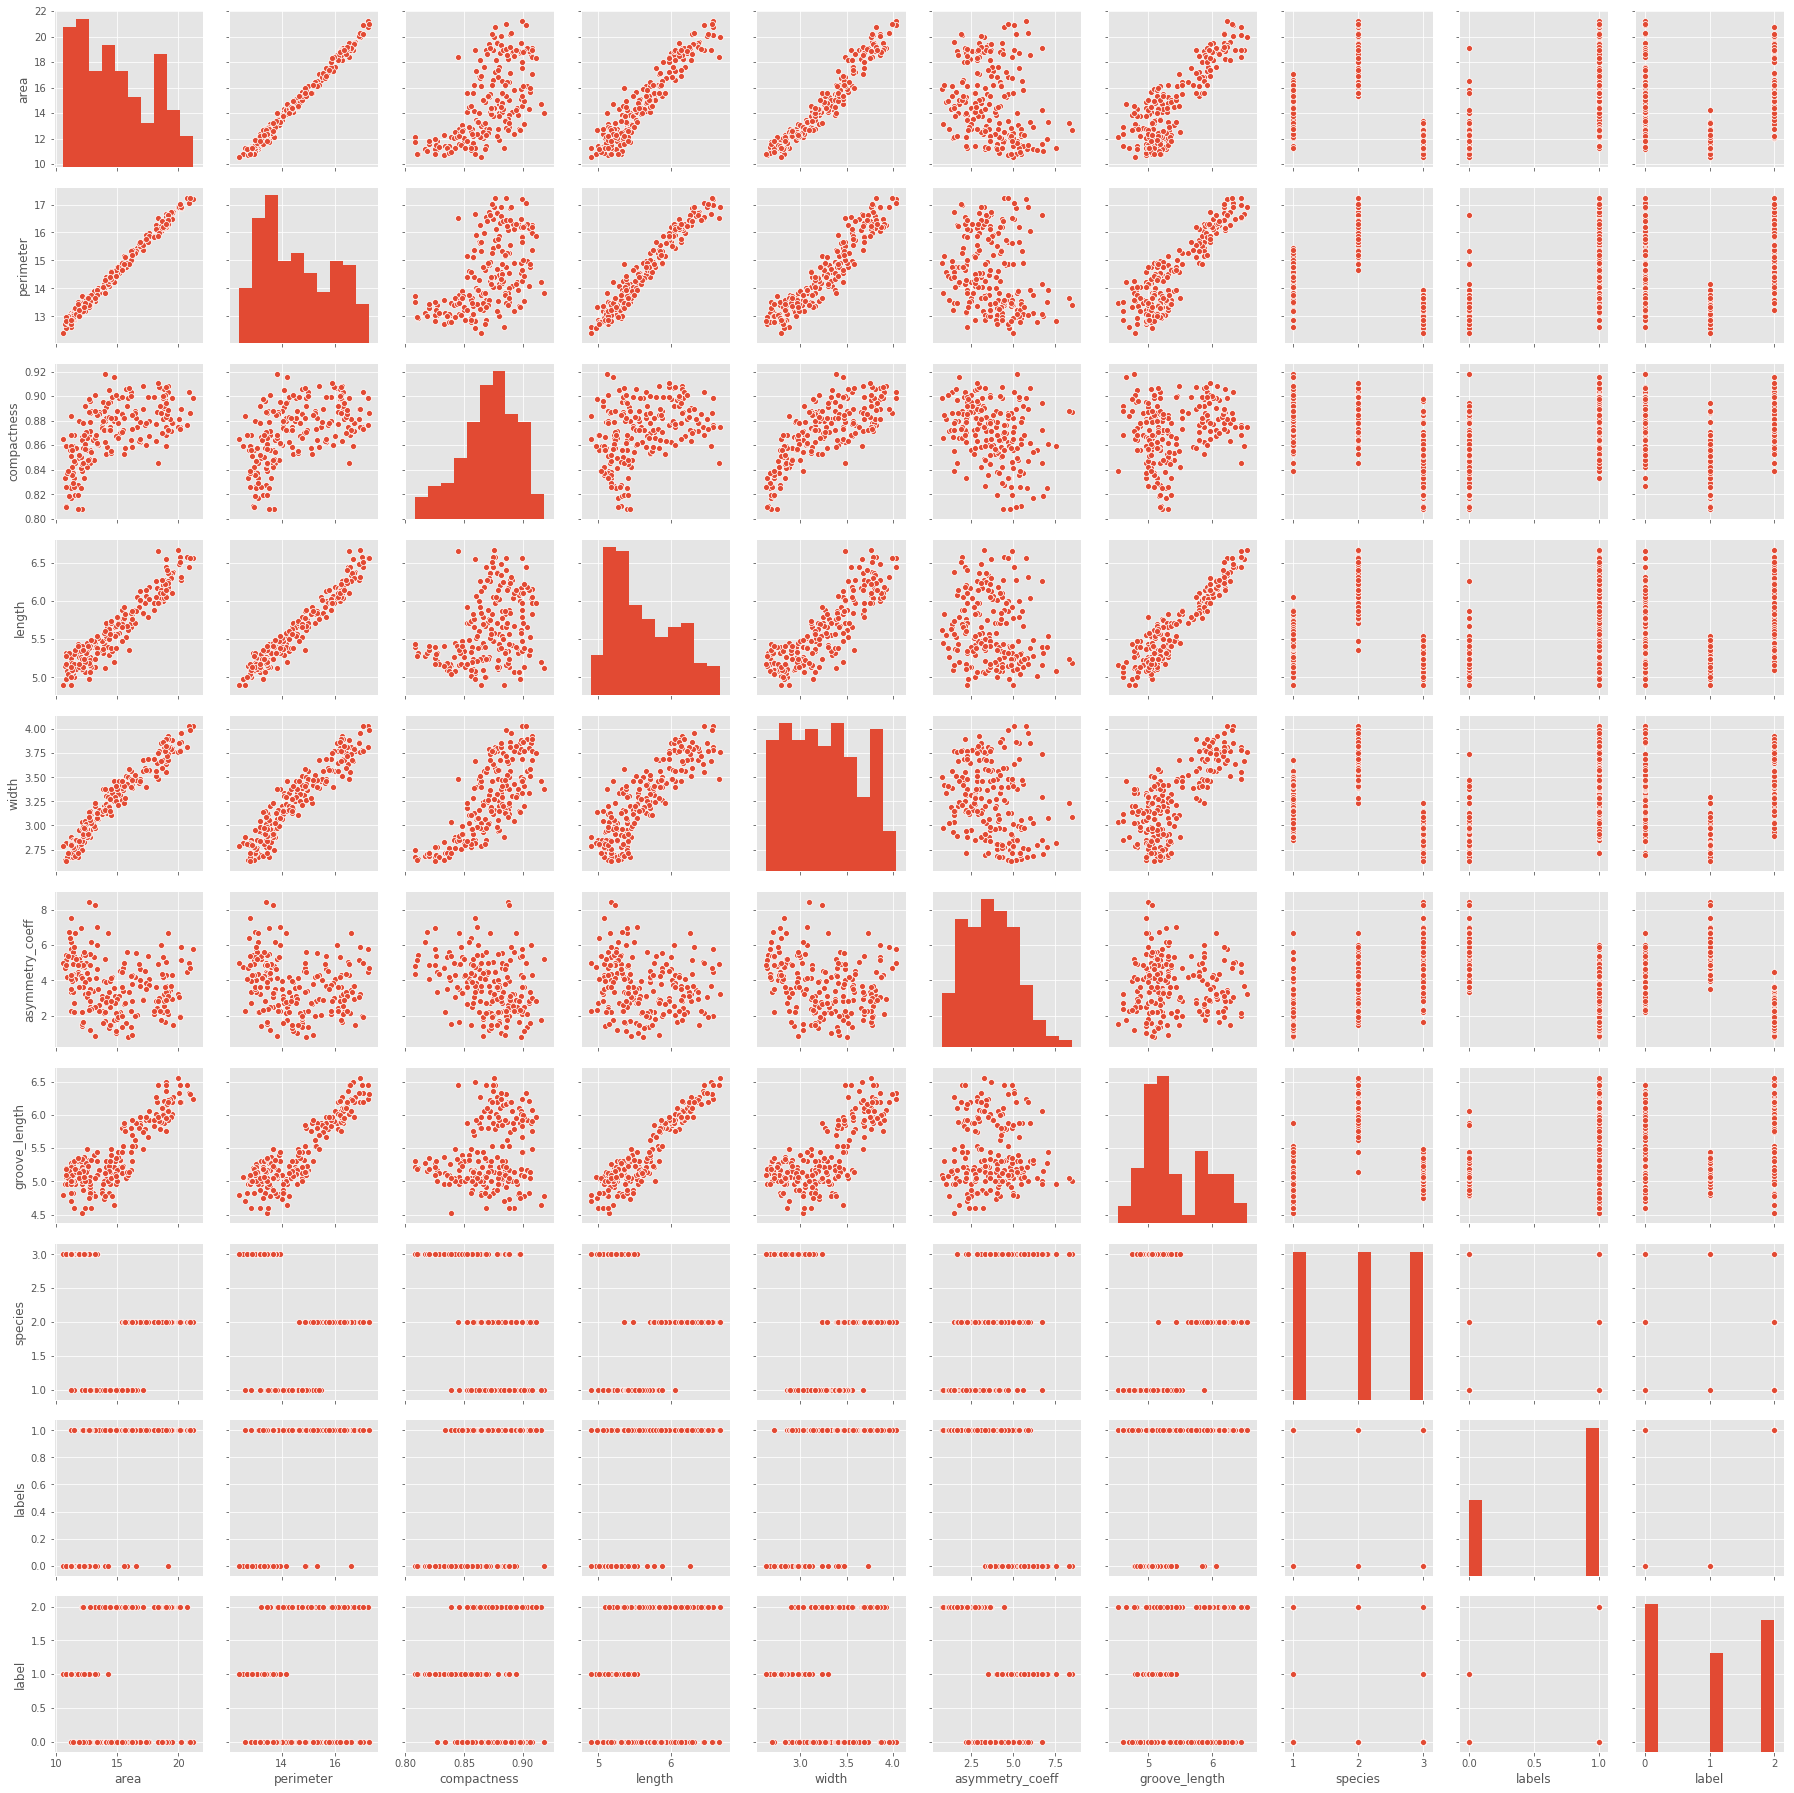

In [69]:
sns.pairplot(seeds);

C:\Users\Ali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ali\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


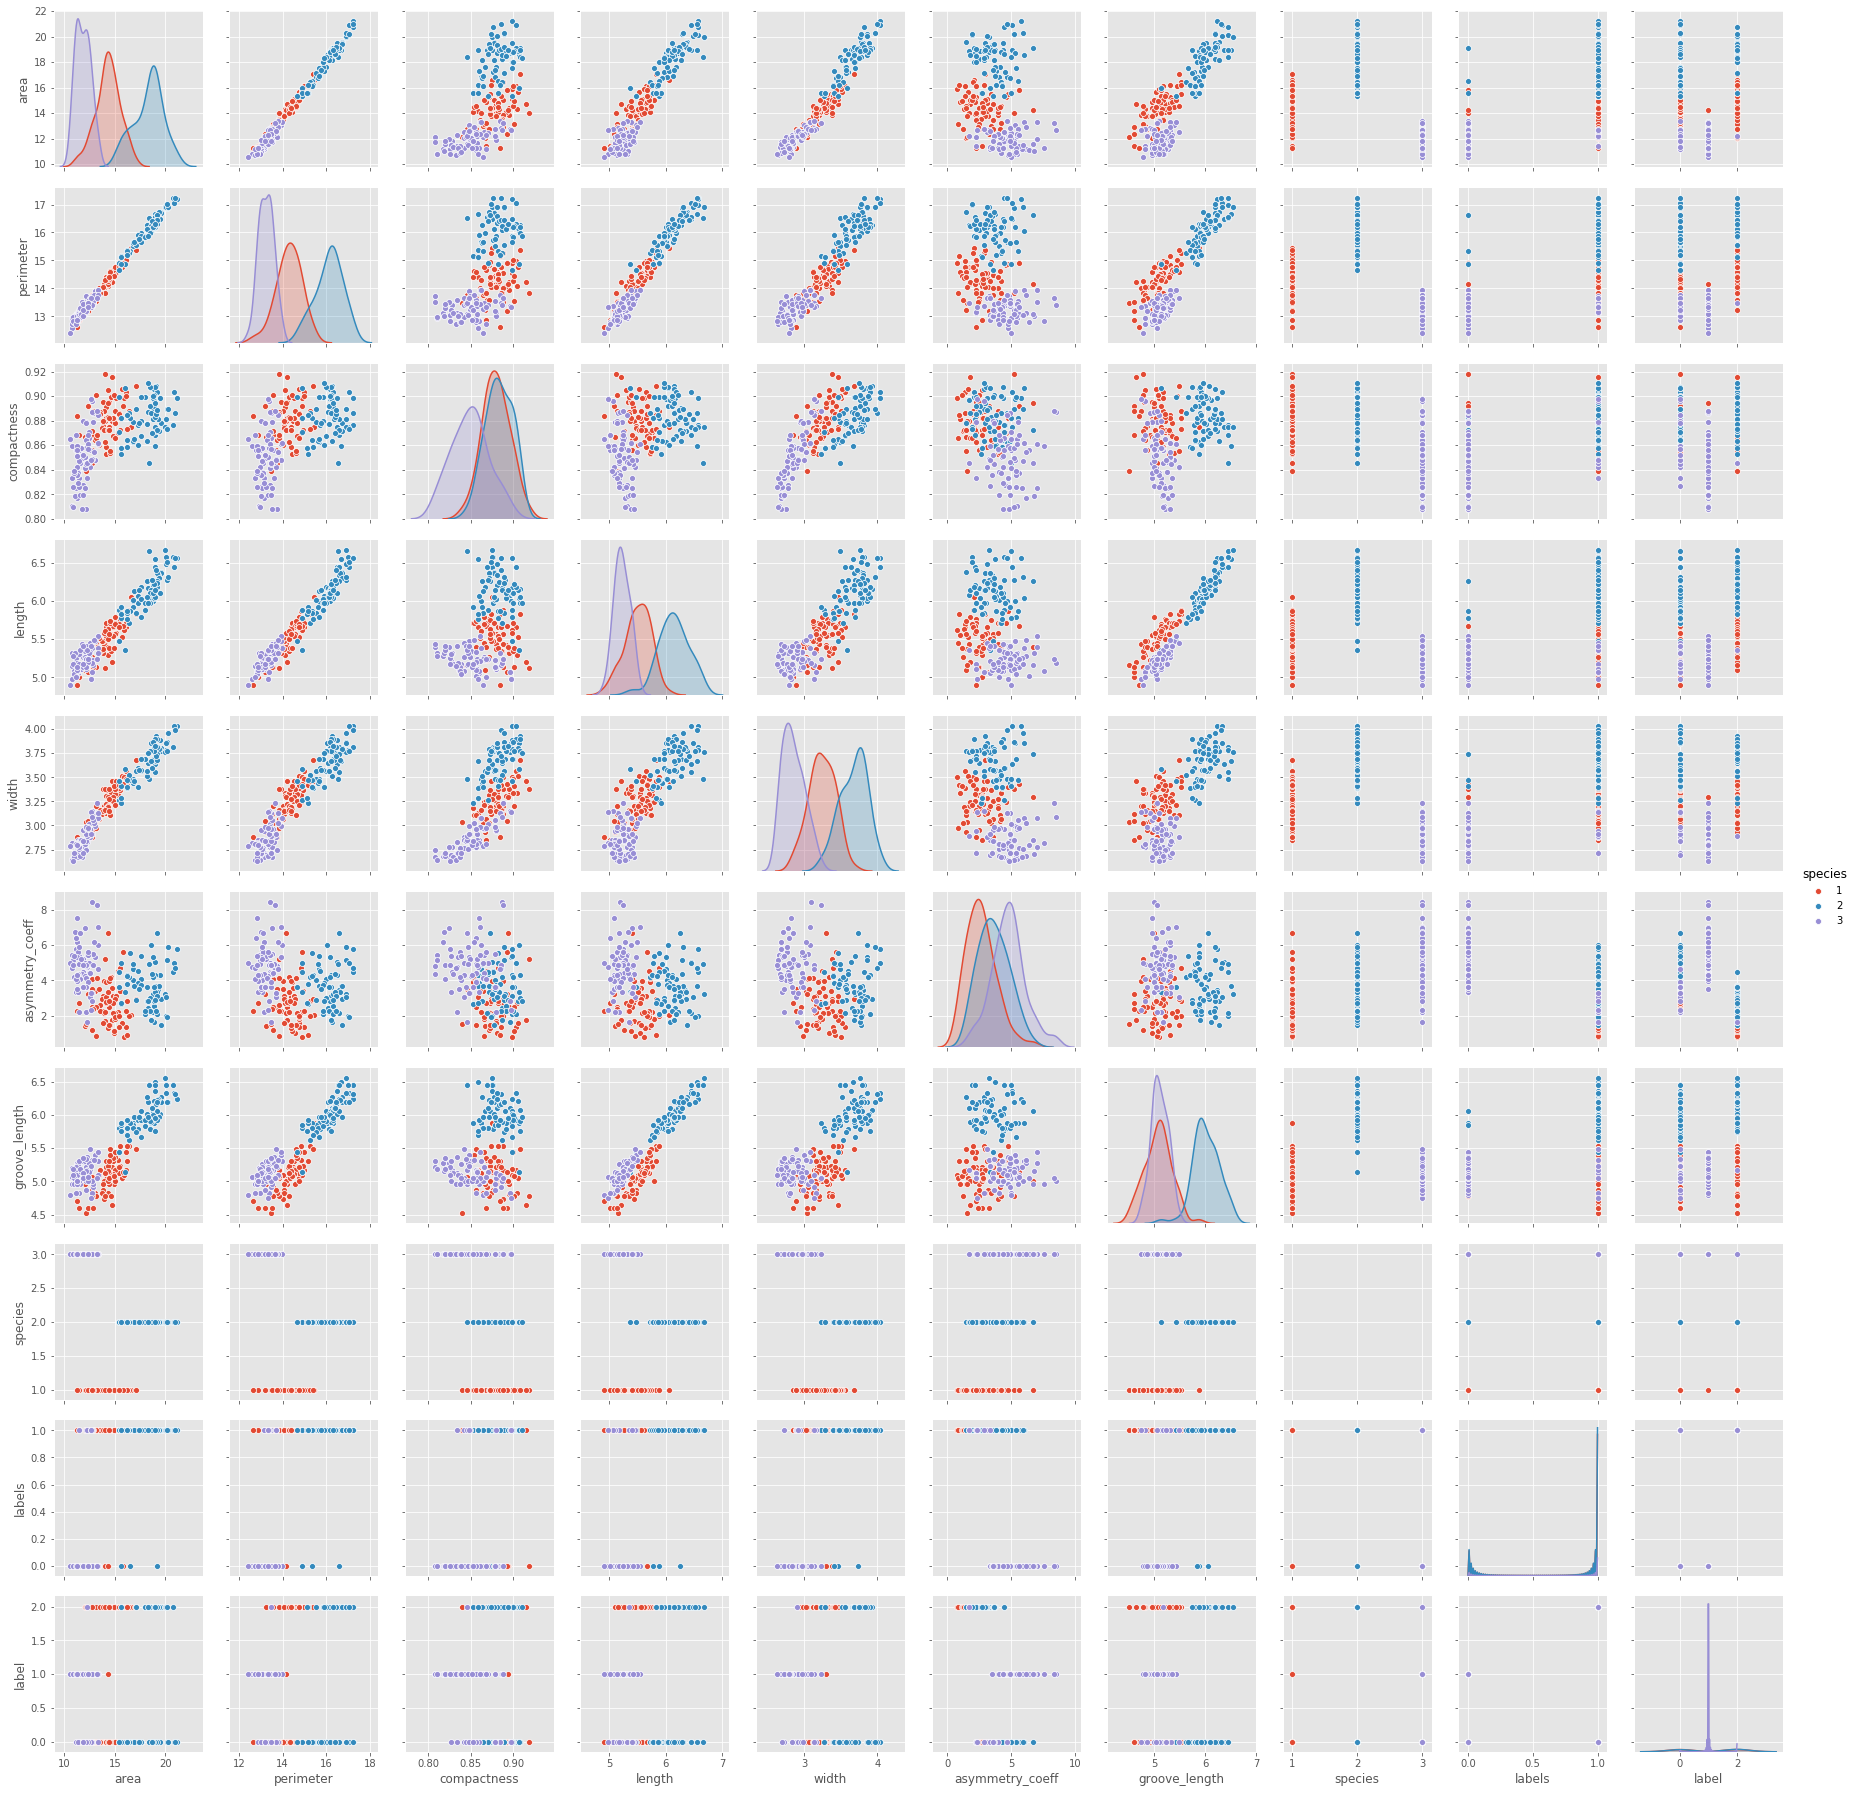

In [70]:
sns.pairplot(data=seeds,hue='species');

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [52]:
x= seeds.drop('species',axis=1)
y=seeds.species

# Scale the data
from sklearn.preprocessing import normalize

xn = normalize(x)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. Lets try using 2, 4 and 6 cluster splits. Run the clustering algorithm with each of those k values.

In [53]:
from sklearn.cluster import KMeans

# 2 Clusters
k_mean2 = KMeans(n_clusters=2)
k_mean2.fit(xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
# 4 clusters

k_mean4 =KMeans(n_clusters=4)
k_mean4.fit(xn)

# 6 clusters

k_mean6=KMeans(n_clusters=6)
k_mean6.fit(xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 5. Get the labels and centroids for the models

In [97]:
labels_2=k_mean2.labels_
clusters_2=k_mean2.cluster_centers_
print (labels_2 , clusters_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0] [[0.59452087 0.65538982 0.04178222 0.2581907  0.14176089 0.24787804
  0.25185439]
 [0.66929175 0.63185432 0.03700914 0.24244146 0.14335061 0.12355609
  0.2308226 ]]


In [59]:
labels_4=k_mean4.labels_
clusters_4=k_mean4.cluster_centers_
print (labels_4,clusters_4)

[0 0 2 0 0 0 2 2 0 0 3 0 2 2 2 3 1 0 0 2 2 2 0 2 0 0 2 2 2 2 0 3 2 0 0 0 0
 0 2 1 2 2 2 3 2 0 0 2 0 0 2 3 2 2 0 0 2 0 0 2 2 2 2 2 0 2 0 2 0 2 3 3 3 0
 3 3 3 3 3 0 3 3 3 0 0 0 0 3 3 3 0 0 0 3 3 3 0 0 0 0 3 0 3 0 0 0 0 3 0 0 0
 3 0 3 3 0 3 0 3 0 3 3 3 0 3 3 3 0 0 3 0 0 3 3 3 3 3 0 0 3 1 1 1 1 1 1 2 1
 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1 2 1] [[0.68205219 0.62736772 0.0360679  0.24010902 0.14303529 0.08835653
  0.22863883]
 [0.58749248 0.65603307 0.04202818 0.2591535  0.14127454 0.26205395
  0.25328319]
 [0.62714597 0.66026143 0.04186069 0.25669863 0.14714433 0.14546228
  0.24181967]
 [0.68198996 0.61332482 0.03418247 0.23379801 0.13956099 0.17425256
  0.22691563]]


In [60]:
labels_6=k_mean6.labels_
clusters_6=k_mean6.cluster_centers_
print (labels_6,clusters_6)

[0 0 5 0 0 5 5 5 0 0 2 0 5 5 5 2 2 0 0 3 5 5 0 0 0 0 5 5 5 5 0 5 5 0 0 4 4
 4 5 1 5 5 5 2 5 0 0 5 5 0 5 2 5 5 0 0 5 0 0 0 5 5 5 3 0 5 0 0 0 5 2 2 2 4
 2 2 2 2 2 4 2 2 2 4 4 4 4 4 2 2 4 4 4 2 2 2 4 4 4 4 2 4 2 4 4 4 4 2 4 4 4
 4 4 2 2 4 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 2 2 2 2 4 5 5 2 3 1 1 1 3 1 5 3
 5 1 3 1 3 3 3 1 3 3 3 1 5 3 3 3 1 5 3 3 3 3 1 1 3 1 1 3 1 3 1 0 3 3 3 1 1
 3 3 3 1 1 1 3 3 3 3 3 1 3 5 5 1 5 3 1 3 3 3 1 3 1] [[0.65564274 0.65102356 0.03965859 0.25101767 0.14725162 0.07292262
  0.23151032]
 [0.58081986 0.64859659 0.04162641 0.25645766 0.14036378 0.2993103
  0.25094931]
 [0.67982692 0.61360367 0.03448039 0.23343219 0.14011417 0.18176598
  0.22668659]
 [0.59465346 0.66440781 0.04257189 0.26225293 0.14260619 0.21802021
  0.25589882]
 [0.70001446 0.61016572 0.03334147 0.23258029 0.13964832 0.10308825
  0.22720287]
 [0.63755305 0.65505229 0.04102218 0.25367881 0.14695966 0.13873912
  0.23749169]]


### 6. Compute the Silhouette Score to evaluate your clustering models

Silhouette score ranges from -1 to 1, with 1 being the best.

In [71]:
from sklearn.metrics import silhouette_score
print(silhouette_score(xn, labels_2))
print(silhouette_score(xn, labels_4))
print(silhouette_score(xn, labels_6))

0.5014485204560787
0.3753136526584662
0.36196745212852127


### 7. Plot `length` vs. `groove_length` using the Clusters from each Model.

Each time, compare to the actual species classification.


Text(0.5, 1.0, 'Predicted Cluster')

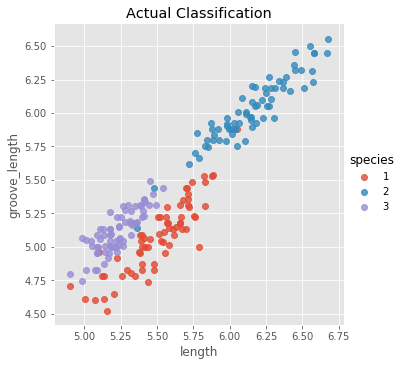

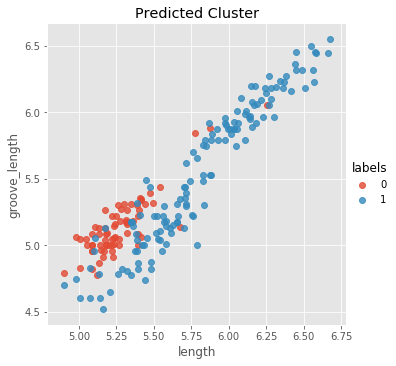

In [101]:
seeds2 = seeds
seeds2['labels'] = labels_2

sns.lmplot(x='length', y='groove_length', data=seeds2, hue='species', 
           fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds2, hue='labels',
           fit_reg=False)
plt.title('Predicted Cluster')

Text(0.5, 1.0, 'Predicted Cluster')

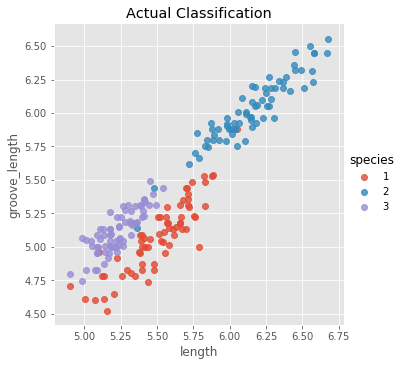

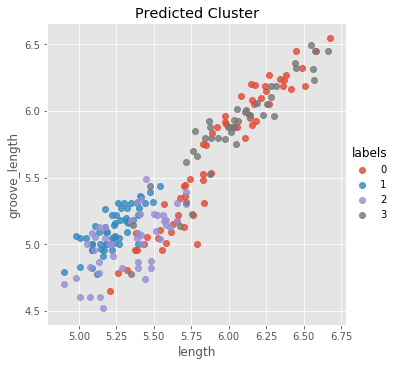

In [102]:
seeds4 = seeds
seeds4['labels'] = labels_4

sns.lmplot(x='length', y='groove_length', data=seeds4, hue='species',fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds4, hue='labels',fit_reg=False)
plt.title('Predicted Cluster')

Text(0.5, 1.0, 'Predicted Cluster')

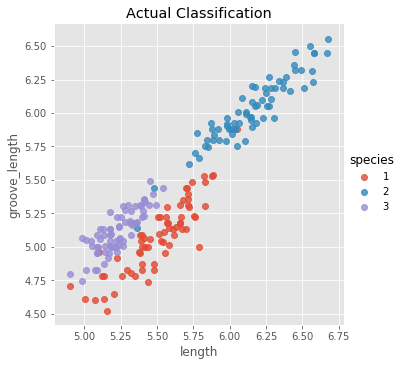

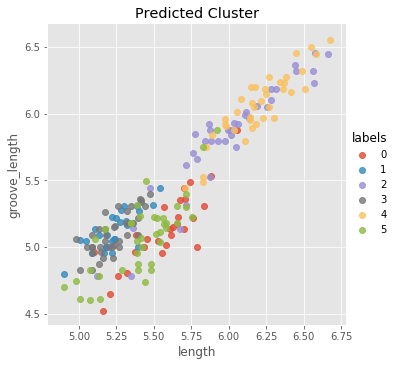

In [103]:
seeds6 = seeds
seeds6['labels'] = labels_6

sns.lmplot(x='length', y='groove_length', data=seeds6, hue='species',fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds6, hue='labels',fit_reg=False)
plt.title('Predicted Cluster')

### 8. Evaluate a K-Means model with `k=3` clusters.

1. Construct the model.
- Print the labels and centroids.
- Evaluate the model with silhouette score.
- Plot `length` vs. `groove_length` and compare the clusters to the actual species.

In [65]:
k_mean3=KMeans(n_clusters=3)
k_mean3.fit(xn)
labels_3=k_mean3.labels_
clusters_3=k_mean3.cluster_centers_
print (labels_3,clusters_3)
silhouette_score(xn,labels_3)

[2 2 2 2 2 2 0 0 2 2 0 2 0 0 0 0 0 2 2 0 0 0 2 2 2 2 0 0 0 0 2 0 0 2 2 2 2
 2 0 1 0 2 0 0 0 2 2 0 2 2 0 0 0 0 2 2 0 2 2 2 0 0 0 0 2 0 2 2 2 0 0 0 0 2
 0 0 0 2 0 2 0 0 0 2 2 2 2 2 0 0 2 2 2 0 0 0 2 2 2 2 0 2 0 2 2 2 2 0 2 2 2
 2 2 0 0 2 0 2 2 2 0 2 0 2 0 0 0 2 2 0 2 2 0 0 0 0 0 2 2 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1] [[0.65183315 0.63787766 0.03839607 0.24570521 0.14384604 0.16630226
  0.23447476]
 [0.58577789 0.65701769 0.04206546 0.25989165 0.14093225 0.26181498
  0.25438962]
 [0.67910182 0.62902036 0.03628397 0.24094568 0.14306998 0.09228806
  0.22941977]]


0.35400356122241194

Text(0.5, 1.0, 'Predicted Cluster')

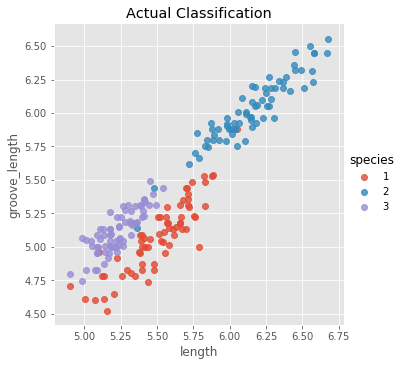

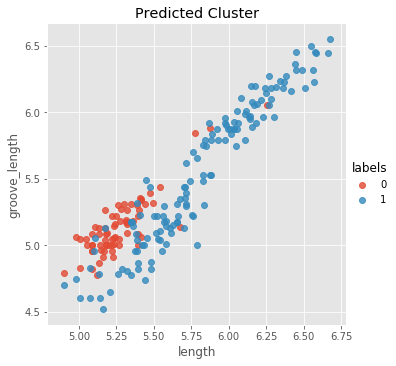

In [66]:
seed2=seeds
seed2['label']=labels_3
sns.lmplot(x='length', y='groove_length', data=seeds2, hue='species', 
           fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds2, hue='labels',
           fit_reg=False)
plt.title('Predicted Cluster')